# Setup

### Activate inline plotting

In [1]:
%pylab inline
import sys
sys.path.insert(0, '..')

Populating the interactive namespace from numpy and matplotlib


### Import Dataset(s)

In [2]:
from tracking import Hough
from hits import AllHits

In [3]:
hit_data = AllHits('../data/signal.root')
print hit_data.n_events

38996


###Define Finding Algorithm

In [5]:
%time
hough = Hough(hit_data)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs


### Drawing Function(s)

In [15]:
def setup_plot_for_detector(size=(15, 15)):
    figsize(*size)
    axes(polar=True)
    # set appropriate
    ylim(0, 85)   

###Check Data Access

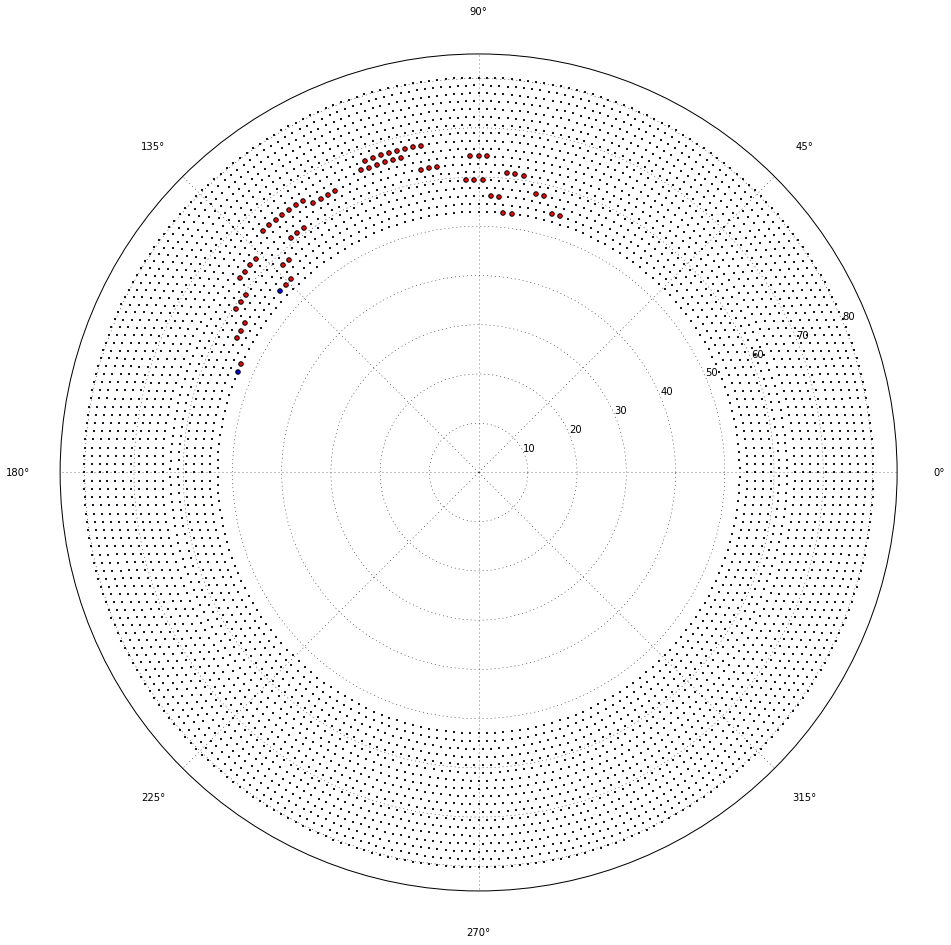

In [16]:
setup_plot_for_detector()
rhos, phis = hit_data.cydet.get_points_rhos_and_phis()
scatter(phis, rhos, marker='.', s=5)

sig = hit_data.get_sig_wires(10)
bkg = hit_data.get_bkg_wires(10)
scatter(phis[sig],rhos[sig], marker='o', c='r')
scatter(phis[bkg],rhos[bkg], marker='o', c='b')

###Check the Hough Correspondence

11526


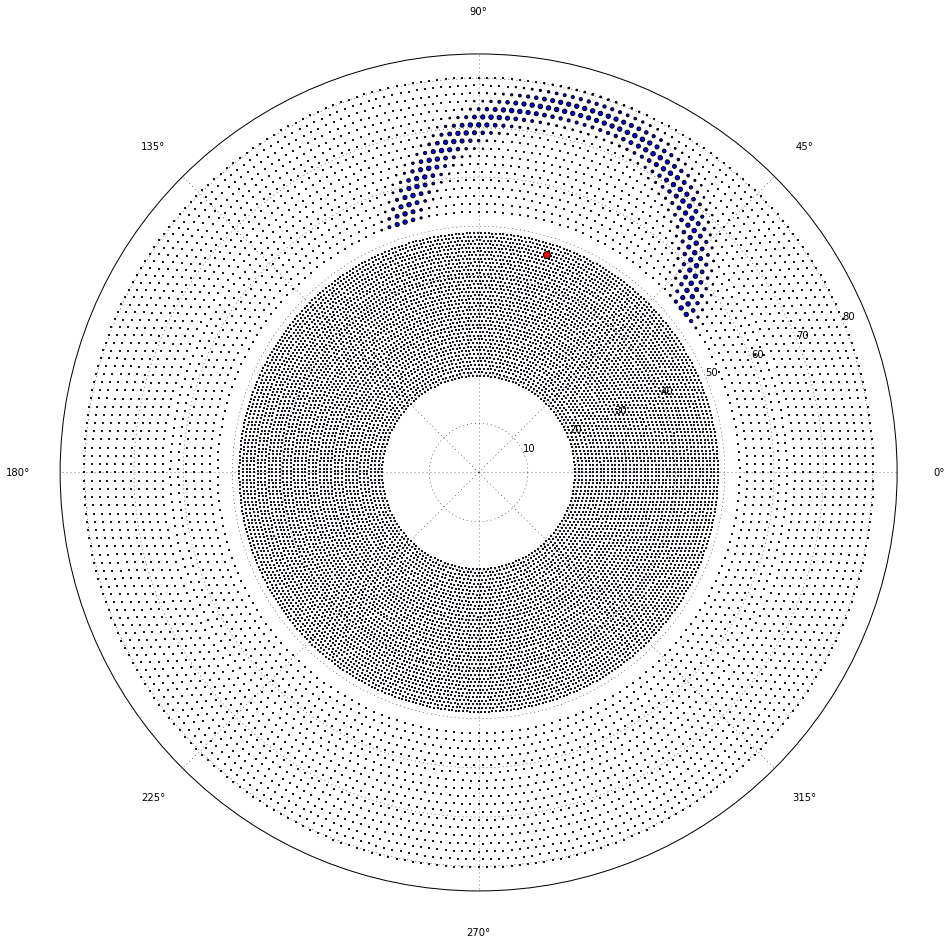

In [10]:
from scipy.sparse import find
trk_0 = 10000
wire_0 = 10000
corr_track = find(hough.correspondence[:,trk_0])[0]
signal_size = find(hough.correspondence[:,trk_0])[2]
setup_plot_for_detector()
rhos, phis = hough.hit_data.cydet.get_points_rhos_and_phis()
t_rhos, t_phis = hough.track.get_points_rhos_and_phis()
scatter(phis, rhos, marker='.', s=5)
scatter(t_phis, t_rhos, marker='.', s=5)

scatter(phis[corr_track],rhos[corr_track], signal_size*100, marker='o', c='b')
scatter(t_phis[trk_0],t_rhos[trk_0], marker='o', s=50, c='r')

print hough.track.n_points

11526


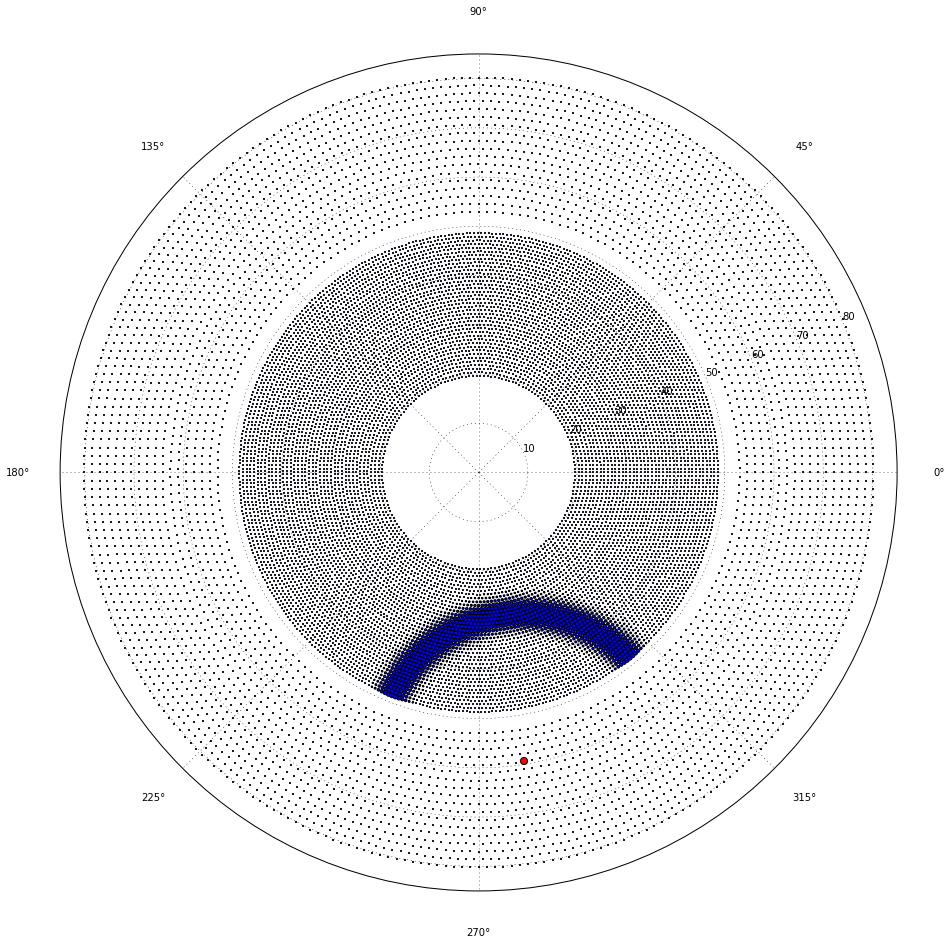

In [13]:
from scipy.sparse import find
wire_0 = 1000
corr_track = find(hough.correspondence[wire_0,:])[1]
signal_size = find(hough.correspondence[wire_0,:])[2]
setup_plot_for_detector()
rhos, phis = hough.hit_data.cydet.get_points_rhos_and_phis()
t_rhos, t_phis = hough.track.get_points_rhos_and_phis()
scatter(phis, rhos, marker='.', s=5)
scatter(t_phis, t_rhos, marker='.', s=5)

scatter(t_phis[corr_track],t_rhos[corr_track], signal_size*100, marker='o', c='b')
scatter(phis[wire_0],rhos[wire_0], marker='o', s=50, c='r')

print hough.track.n_points